<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/RondemForest_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Gerekli kütüphaneleri yüklüyoruz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ayarları belirliyoruz
sns.set(style='whitegrid')
%matplotlib inline


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

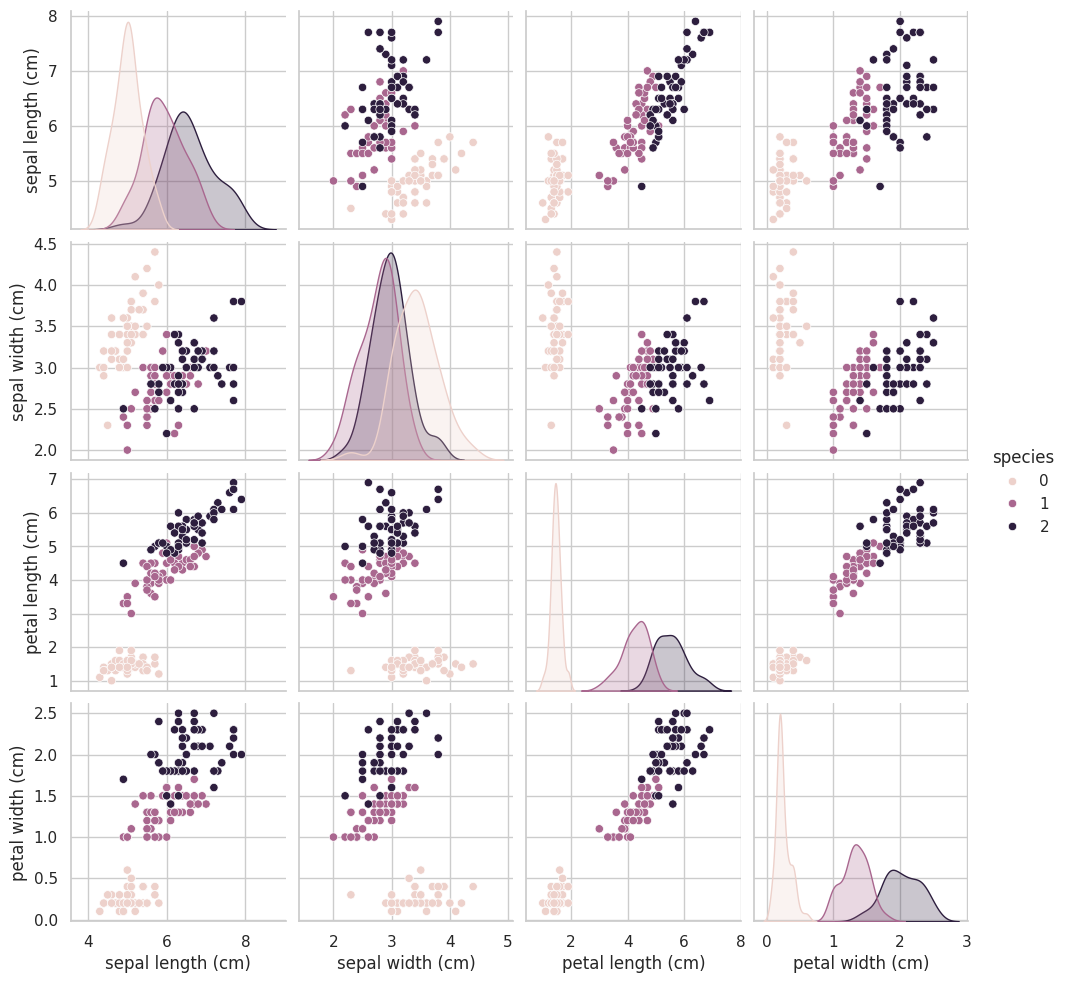

In [2]:
# İris veri setini yüklüyoruz
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

# Veri setinin ilk 5 satırını görüntülüyoruz
print(df.head())

# Veri setinin dağılımını ve temel istatistiklerini inceliyoruz
print(df.describe())
print(df['species'].value_counts())

# Veri setinin görselleştirilmesi
sns.pairplot(df, hue='species')
plt.show()


In [3]:
# Veriyi eğitim ve test setlerine bölüyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



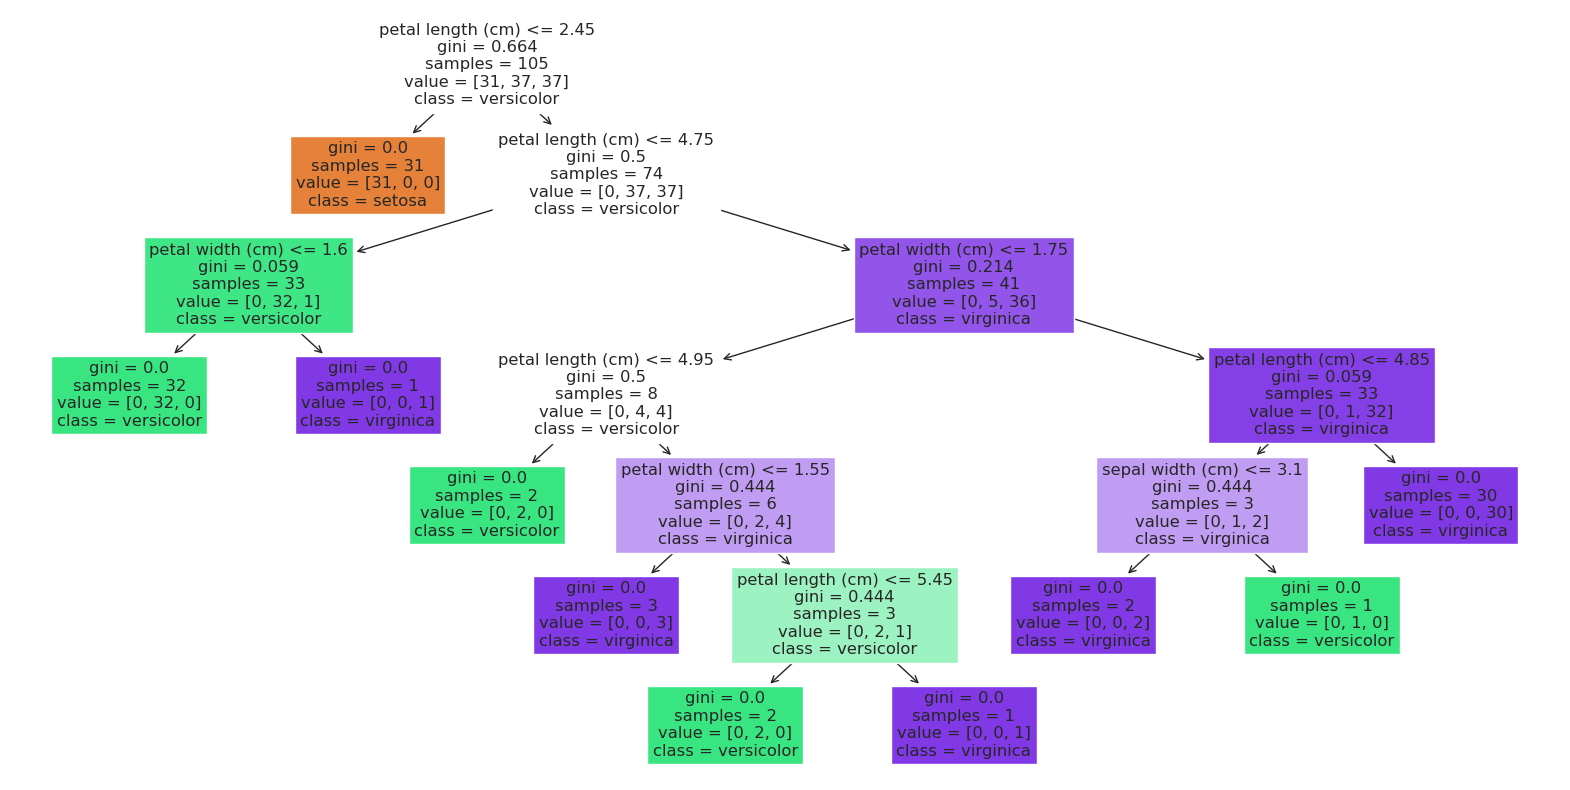

In [4]:
# Karar ağacı modelini oluşturuyoruz
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Modeli test verisi ile değerlendiriyoruz
y_pred_dt = decision_tree.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Decision Tree Classification Report:\n {classification_report(y_test, y_pred_dt)}")

# Karar ağacını görselleştiriyoruz
plt.figure(figsize=(20,10))
plot_tree(decision_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



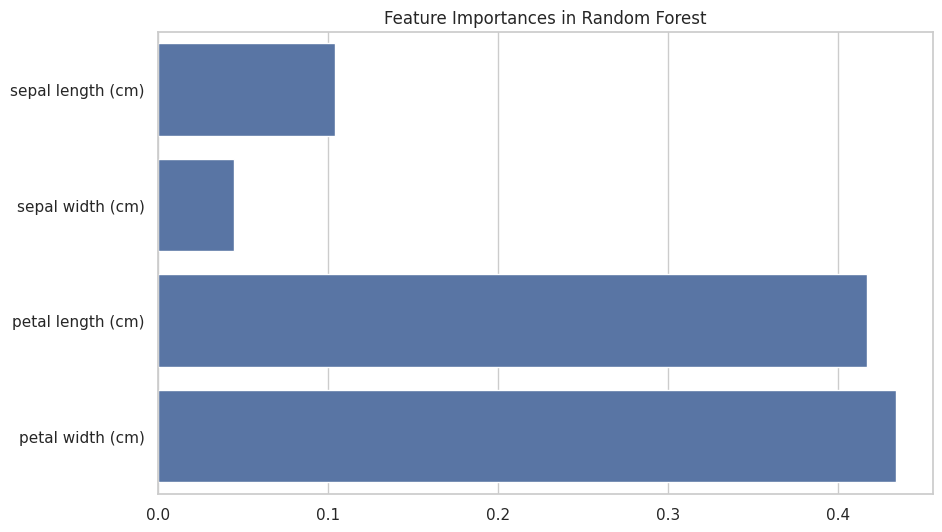

In [5]:
# Rastgele ormanlar modelini oluşturuyoruz
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Modeli test verisi ile değerlendiriyoruz
y_pred_rf = random_forest.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest Classification Report:\n {classification_report(y_test, y_pred_rf)}")

# Rastgele ormanın önemli özelliklerini görselleştiriyoruz
feature_importances = random_forest.feature_importances_
features = iris.feature_names

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances in Random Forest')
plt.show()


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


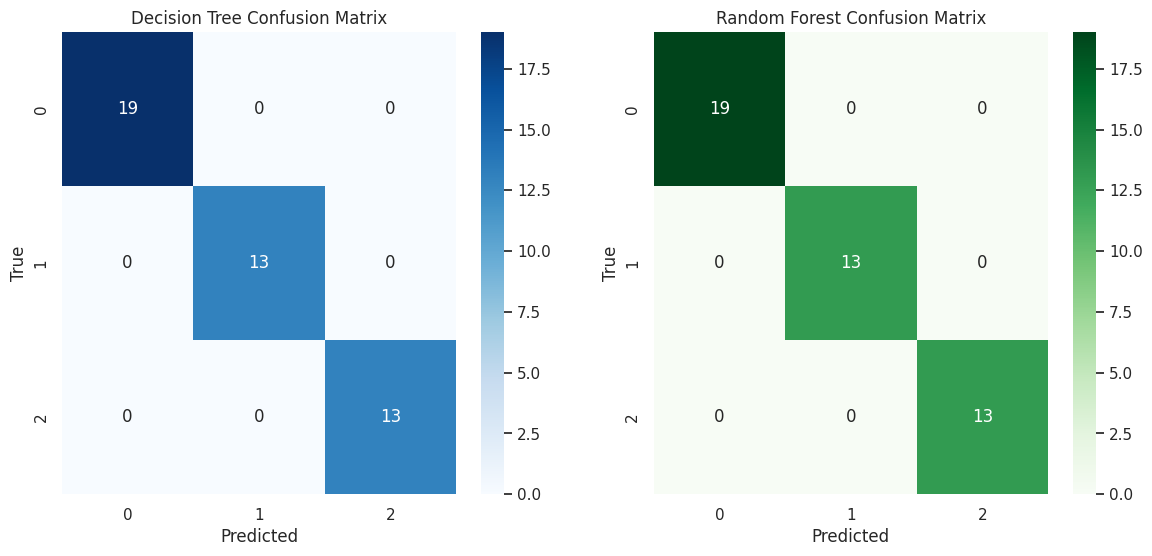

In [6]:
# Karar Ağacı ve Rastgele Ormanlar modellerinin doğruluklarını karşılaştırıyoruz
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")

# Karışıklık matrislerini görselleştiriyoruz
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Decision Tree Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()
